# Data Processing and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('DATA RUMAH.xlsx')
df

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


1. Nama Rumah = House name
2. LB = Total Building Area
3. LT = Total Land Area
4. KT = Number of Bedrooms
5. KM = Number of Bathrooms
6. GRS = Number of Car Capacity in the Garage
7. Harga = House prices (IDR)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


In [4]:
df.drop(['NO', 'NAMA RUMAH'],axis='columns',inplace=True)

In [5]:
df.describe()

,HARGA,LB,LT,KT,KM,GRS
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


# Exploratory data Analysis (EDA)

In [6]:
df.shape

(1010, 6)

In [7]:
df.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


<Axes: xlabel='KT', ylabel='count'>

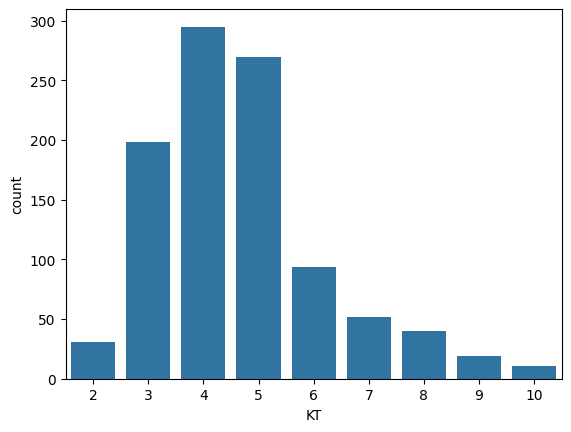

In [8]:
sns.countplot(x='KT', data=df)

It can be seen that the average house has 4 to 5 bedrooms.

C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

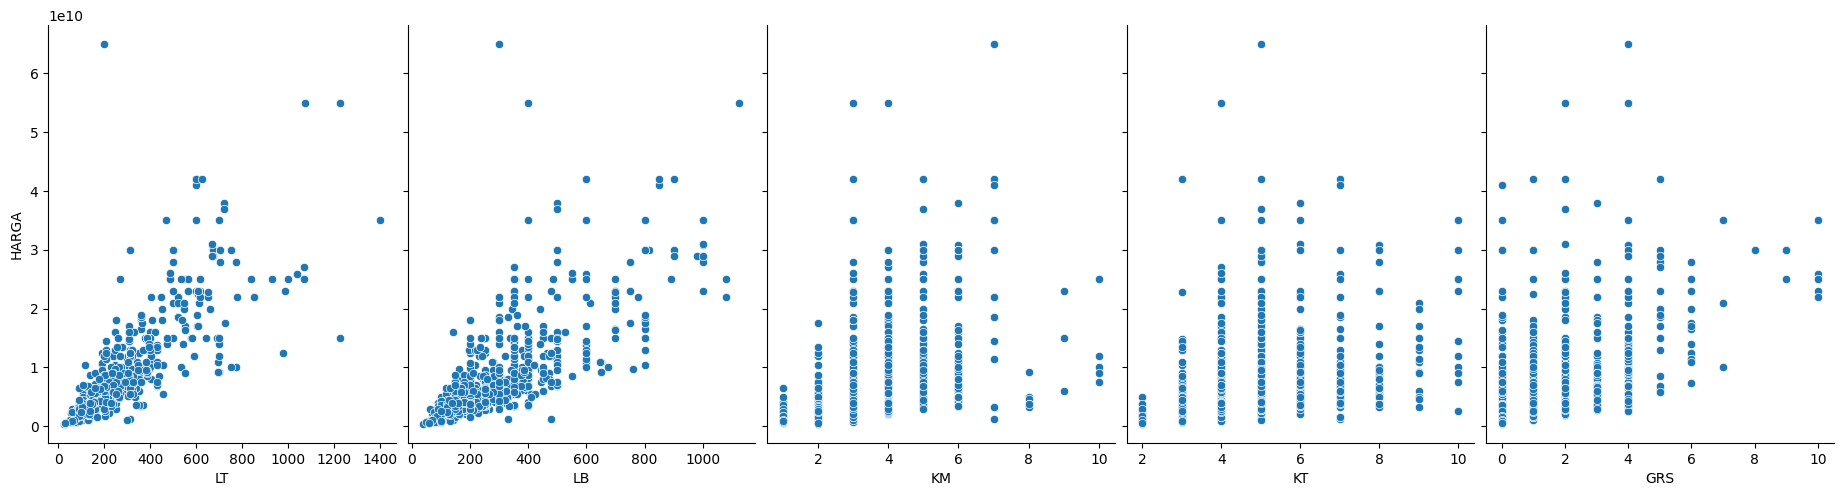

In [9]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['LT', 'LB', 'KM', 'KT', 'GRS'], y_vars=['HARGA'], size=5, aspect=0.75)
plt.show()

In [10]:
df.corr()

,HARGA,LB,LT,KT,KM,GRS
HARGA,1.000000,0.747083,0.809617,0.323320,0.404770,0.484892
LB,0.747083,1.000000,0.740341,0.443578,0.529889,0.492331
LT,0.809617,0.740341,1.000000,0.425484,0.388504,0.484394
KT,0.323320,0.443578,0.425484,1.000000,0.669457,0.280445
KM,0.404770,0.529889,0.388504,0.669457,1.000000,0.345323
GRS,0.484892,0.492331,0.484394,0.280445,0.345323,1.000000


From the correlation table above, it can be seen that overall the variables have a strong relationship with price. 
LB = Total Building Area and LT = Total Land Area has a very strong relationship with price.

# Modelling
y adalah variabel Independen x adalah variabel Dependen

In [11]:
x=df[['LB', 'LT', 'KT', 'KM', 'GRS' ]]
y=df['HARGA']


In [12]:
x

,LB,LT,KT,KM,GRS
0,220,220,3,3,0
1,180,137,4,3,2
2,267,250,4,4,4
3,40,25,2,2,0
4,400,355,6,5,3
...,...,...,...,...,...
1005,450,550,10,10,3
1006,160,140,4,3,2
1007,139,230,4,4,1
1008,360,606,7,4,0


# Training Model

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=4)

In [48]:
x_train.shape

(676, 5)

In [49]:
x_test.shape

(334, 5)

In [46]:
len(x_train.columns)

5

In [50]:
ln_reg = LinearRegression()

In [51]:
ln_reg.fit(x_train, y_train)

LinearRegression()

# Testing

In [52]:
print(ln_reg.coef_)
print(ln_reg.intercept_)

[ 1.25800003e+07  2.55998605e+07 -6.98072295e+08  3.97870126e+08
  1.70074118e+08]
-380694933.9813843


from the above values, if put into the formula it becomes: Y= 1.25800003e+07 + 2.55998605e+07 - 6.98072295e+08 + 3.97870126e+08

In [53]:
y_pred=ln_reg.predict(x_test)

In [54]:
ln_reg.score(x_test, y_test)

0.5991895352055023

Accuracy modell 59.91 %

#Case Study
1. Arhan wants to find a creteria house in Jakarta with the following creteria:
    - Building Area (LB) = 150
    - land Area (LT) = 159
    - Number of bedrooms (KT) = 5
    - Number of Bathrooms (KM) = 4
    - garage (GRS) = 2
2. Azizah wants to find a creteria house in Jakarta with the following creteria:
    - Building Area (LB) = 450
    - land Area (LT) = 550
    - Number of bedrooms (KT) = 5
    - Number of Bathrooms (KM) = 4
    - garage (GRS) = 2

In [23]:
#dream house Arhan
import math
print("Arhan dream house costs approx IDR {:,} million".format(math.floor(ln_reg.predict([[150,159,5,4,2]])/1000000)))

Arhan dream house costs approx IDR 4,017 million


C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\muham\AppData\Local\Temp\ipykernel_1640\2469917186.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Arhan dream house costs approx IDR {:,} million".format(math.floor(ln_reg.predict([[150,159,5,4,2]])/1000000)))


In [24]:
#dream House Azizah 
print("Azizah dream house costs in IDR {:,} million".format(math.floor(ln_reg.predict([[450,55,5,4,2]])/1000000)))

Azizah dream house costs in IDR 5,129 million


C:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\muham\AppData\Local\Temp\ipykernel_1640\3972950554.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Azizah dream house costs in IDR {:,} million".format(math.floor(ln_reg.predict([[450,55,5,4,2]])/1000000)))


# Recommendation 
Although the model accuracy is 59.91%, this Linear Regression experiment has demonstrated the effectiveness of using this method. One recommendation for future experiments is to test the Classical Assumptions of the model to ensure it is free from data bias